# Metody inteligencji obliczeniowej w analizie danych

Budowa modelu perceptronu wielowarstwowego (MLP) – sieci neuronowej typu feedforward.

## Bazowa implementacja 

Należy zaimplementować sieć neuronową typu MLP, w której można ustawić:

* liczbę warstw
* liczbę neuronów w każdej z warstw
* wagi poszczególnych połączeń (w tym bias)

Sieć ma używać sigmoidalnej funkcji aktywacji:

$$ \sigma(x) = \frac{e^x}{e^x + 1} $$

a na wyjściu może być funkcja liniowa.

Oprócz tego implementacja musi być przygotowana w taki sposób, żeby łatwo zmienić:

* architekturę (liczba wejść/wyjść, liczba neuronów w warstwach ukrytych)
* funkcję aktywacji

### Działanie

Przykładowo mamy następującą sieć:

![](img/nn_scheme-1.png)

Ma ona:

* dwa wejścia 
* warstwę ukrytą z czterema neuronami
* warstwę ukrytą z trzema neuronami
* dwa wyjścia 


Weźmy input o 100 obserwacjach. Mamy wtedy na wejściu macierz $X^{100 \times 2}$.

Na pierwszej ukrytej warstwie każdy neuron ma po dwa połączenia z wejściem. Te połączenia mają swoje wagi. Wagi wszystkich neuronów w tej warstwie można przedstawić w macierzy $W_1^{4 \times 2}$ (wagi i-tego neuronu są w i-tym wierszu macierzy). Każdy neuron ma też swój bias. Biasy neuronów można zapisać w formie wektora $b_1^{1 \times 4}$. 

Przejście przez warstwę pierwszą można opisać poprzez: 
$$ Z_1 = XW_1^T + b_1  \Longrightarrow  H_1 = f(Z_1),  \text{ gdzie } f \text{ jest funkcją aktywacji w tej warstwie}$$
Wynikowe $H_1$ jest macierzą o rozmiarach $100 \times 4$

Analogicznie przechodzimy przez drugą warstwę i otrzymujemy $H_2^{100 \times 3}$, a potem przez warstwę wyjściową i nasz output to macierz $\hat{Y}^{100 \times 2}$.

### Implementacja

Jest w pliku _mlp.py_ i wytłumaczona w docstringach.


### Wykorzystanie na danych 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from MLP import *
from sklearn.metrics import mean_squared_error

#### 1. square-simple

In [2]:
df_square = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_square_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_square.head() 

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


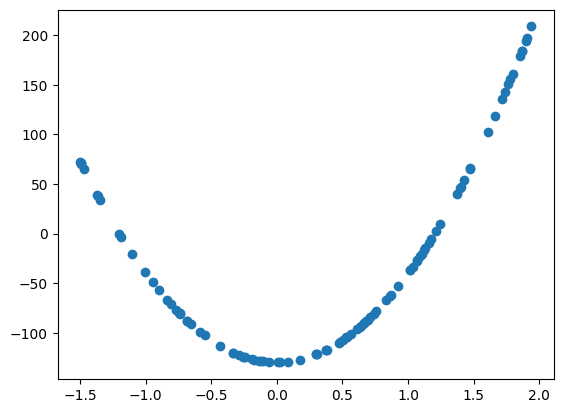

In [3]:
plt.scatter(x=df_square["x"], y = df_square['y'])

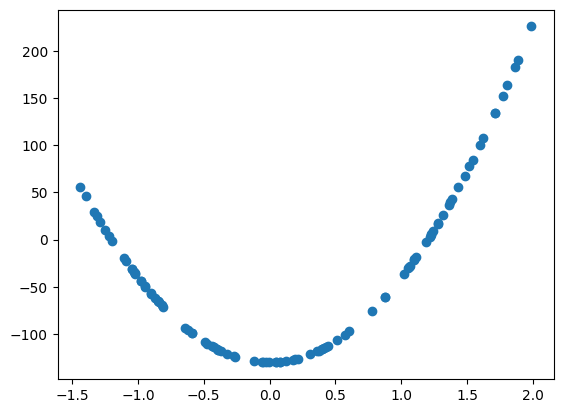

In [4]:
plt.scatter(x=df_square_test["x"], y = df_square_test['y'])

Widać, że dane pochodzą z funkcji kwadratowej. Chcemy wykorzystać naszą sieć w regresji.

##### Sieć z jedną warstwą ukrytą o 5 neuronach

In [5]:
mlp = MLP()

# Two ways of initiating layers in neural network:

#1. initiating a layer with specific number of neurons, and setting the rest afterwards
L0 = Layer(nr_neurons = 5) 
L0.set_weights(np.array([1,1,1,1,1]).reshape(5,1))
L0.set_biases(np.array([2.3, 2, 10, -2, -2.3]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

#2. setting everything when initiating
mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1000, -280, 1, 5, 1360]).reshape(1,5),
    biases = np.array([900]),
    func=linear
    ),name = "Output")

In [6]:
y_train = mlp.predict(df_square[["x"]])
y_test = mlp.predict(df_square_test[["x"]])
print(f'MSE dla: \ntrain: {mean_squared_error(df_square[["y"]], y_train)} \ntest : {mean_squared_error(df_square_test[["y"]], y_test)}')

MSE dla: 
train: 5.694831331892841 
test : 4.046391787053818


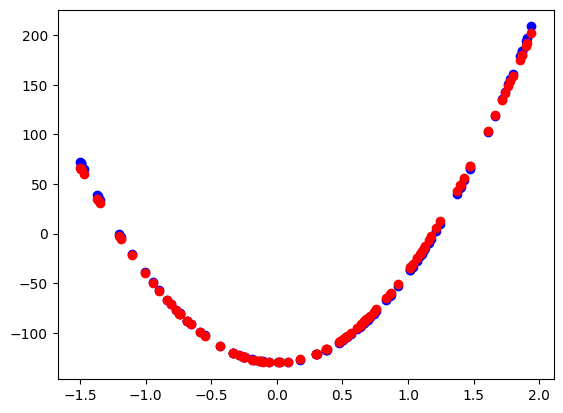

In [7]:
plt.scatter(df_square["x"],df_square["y"], color="blue")
plt.scatter(df_square['x'], y_train, color='red')

Na powyższym wykresie są punkty ze zbioru treningowego. Na niebiesko zaznaczone są prawdziwe wartości, a na czerwono te przewidziane przez sieć.

In [8]:
mlp.summary()

{'Hidden0': {'weights': array([[1],
         [1],
         [1],
         [1],
         [1]]),
  'biases': array([ 2.3,  2. , 10. , -2. , -2.3]),
  'function': <function MLP.sigmoid(x)>},
 'Output': {'weights': array([[-1000,  -280,     1,     5,  1360]]),
  'biases': array([900]),
  'function': <function MLP.linear(x)>}}

#### 2. steps-large 

In [9]:
df_steps = pd.read_csv("data/regression/steps-large-training.csv",index_col=0)
df_steps_test = pd.read_csv("data/regression/steps-large-test.csv",index_col=0)
df_steps.head() 

,x,y
1,-1.481354,-80
2,1.033264,80
3,-0.076403,0
4,-1.419785,-80
5,-0.108398,0


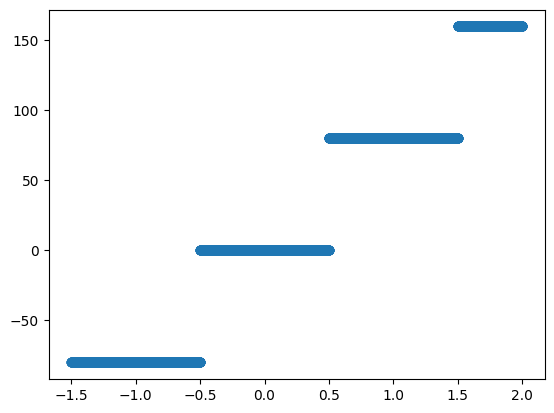

In [10]:
plt.scatter(x=df_steps["x"], y = df_steps['y'])

do ogarniecia:

* przyklady z warstawami i liczba neuronow
* ogarniecie dobrze liczb (prediction error < 9)
* ogarniecie liniowej funkcji wyjścia ogolnie to jest jedna warstaw z biasem i weightami na wejsciach
___

In [11]:

np.random.seed(123)
weights = np.array( # jedna warstwa ukryta
        np.random.rand(1,df.shape[1]-1)
    )
bias = [1,2,0.2,0.3,0.5]
mlp = MLP(weights=weights,biases=bias, functions=sigmoid)

NameError: name 'df' is not defined

In [12]:
weights

NameError: name 'weights' is not defined

In [ ]:
mlp.layers.values()

dict_values([<__main__.MLP.Layer object at 0x7f6c3fe14640>])

In [ ]:
mlp.layers["Layer0"].compute(np.matrix(df[["x","y"]]))

In [ ]:
mlp.predict(np.matrix(df[["x","y"]]))

In [ ]:
mlp.output

matrix([[2.54021658e-27, 1.30212757e-27, 1.00000000e+00, 4.74107864e-26,
         7.63514464e-21, 2.59995556e-29, 2.94506696e-20, 1.56011792e-01,
         6.42653487e-16, 1.57692866e-15, 1.00000000e+00, 1.00000000e+00,
         7.78889433e-22, 3.77754545e-27, 1.00000000e+00, 9.99999975e-01,
         1.00000000e+00, 1.00000000e+00, 9.99828264e-01, 2.77843151e-41,
         1.79744328e-09, 5.45387164e-01, 6.40250937e-30, 2.25045505e-04,
         3.63210770e-27, 2.37501373e-33, 1.71051458e-35, 6.36434549e-28,
         1.61695908e-27, 1.95098062e-22, 1.35143106e-16, 6.14589094e-25,
         1.23749759e-19, 9.99790957e-01, 2.73389017e-21, 1.00000000e+00,
         2.73942525e-01, 1.00000000e+00, 1.00000000e+00, 7.45955147e-05,
         1.85784736e-12, 1.00000000e+00, 6.20043950e-01, 3.75775387e-17,
         1.52211909e-33, 9.67437116e-01, 1.18529407e-38, 1.35361525e-13,
         9.99090813e-01, 3.12479888e-35, 1.00000000e+00, 2.60535510e-29,
         2.35266658e-02, 4.24996164e-10, 1.85659483

In [ ]:
mlp.layers["Layer0"].result

matrix([[2.54021658e-27, 1.30212757e-27, 1.00000000e+00, 4.74107864e-26,
         7.63514464e-21, 2.59995556e-29, 2.94506696e-20, 1.56011792e-01,
         6.42653487e-16, 1.57692866e-15, 1.00000000e+00, 1.00000000e+00,
         7.78889433e-22, 3.77754545e-27, 1.00000000e+00, 9.99999975e-01,
         1.00000000e+00, 1.00000000e+00, 9.99828264e-01, 2.77843151e-41,
         1.79744328e-09, 5.45387164e-01, 6.40250937e-30, 2.25045505e-04,
         3.63210770e-27, 2.37501373e-33, 1.71051458e-35, 6.36434549e-28,
         1.61695908e-27, 1.95098062e-22, 1.35143106e-16, 6.14589094e-25,
         1.23749759e-19, 9.99790957e-01, 2.73389017e-21, 1.00000000e+00,
         2.73942525e-01, 1.00000000e+00, 1.00000000e+00, 7.45955147e-05,
         1.85784736e-12, 1.00000000e+00, 6.20043950e-01, 3.75775387e-17,
         1.52211909e-33, 9.67437116e-01, 1.18529407e-38, 1.35361525e-13,
         9.99090813e-01, 3.12479888e-35, 1.00000000e+00, 2.60535510e-29,
         2.35266658e-02, 4.24996164e-10, 1.85659483

In [ ]:
np.matrix(df[["x","y"]])

matrix([[-7.28294612e+01, -4.02393911e+01],
        [-6.54643958e+01, -6.05015161e+01],
        [ 1.43895885e+01,  7.42239938e+01],
        [-9.23356276e+01,  1.74669156e+01],
        [-6.10584213e+01, -1.67618202e+01],
        [-8.00649728e+01, -3.86409192e+01],
        [-7.93898014e+01,  3.25749692e+01],
        [-1.79508127e+01,  3.42979093e+01],
        [-7.81859350e+01,  6.45600456e+01],
        [-7.63857035e+01,  6.33152775e+01],
        [ 5.67236769e+01,  9.79200878e+01],
        [ 1.93258541e+01,  2.93521592e+01],
        [-6.33414033e+01, -1.91823943e+01],
        [-8.11960476e+01, -1.84881186e+01],
        [ 2.97595306e+01,  6.62146965e+01],
        [ 1.65426459e+01,  1.74818174e+01],
        [ 8.24636552e+01,  9.96269651e+01],
        [ 3.72350348e+01,  3.96446311e+01],
        [-1.49480457e+01,  6.31868214e+01],
        [-9.91222659e+01, -8.85879548e+01],
        [-5.25672651e+01,  5.40805749e+01],
        [-1.03282766e+01,  2.22806703e+01],
        [-8.90585906e+01, -2.164